In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# import cleaned dataset
df = pd.read_csv("cleaned_dataframe.csv")
df2 = df

In [3]:
df['AverageTemperature'] = df['AverageTemperature'] * 9/5 + 32


In [4]:
# transform data into yearly averages for each city for each year
grouped_df = df.groupby(['City', 'Year']).agg({
    'Latitude': 'first',
    'Longitude': 'first', 
    'AverageTemperature': 'mean'
}).reset_index()

In [5]:
grouped_df

City  Year  Latitude  Longitude  AverageTemperature
0     Cairo  1880     29.74      31.38            70.16195
1     Cairo  1881     29.74      31.38            70.80770
2     Cairo  1882     29.74      31.38            68.68085
3     Cairo  1883     29.74      31.38            69.16445
4     Cairo  1884     29.74      31.38            68.41790
...     ...   ...       ...        ...                 ...
1335  Tokyo  2009     36.17     139.23            56.38295
1336  Tokyo  2010     36.17     139.23            56.87690
1337  Tokyo  2011     36.17     139.23            55.97930
1338  Tokyo  2012     36.17     139.23            55.60385
1339  Tokyo  2013     36.17     139.23            57.04070

[1340 rows x 5 columns]

In [6]:
unique_cities = df['City'].unique()
unique_cities

array(['Cairo', 'Cape Town', 'Delhi', 'Ho Chi Minh City', 'Los Angeles',
       'Melbourne', 'New York', 'Paris', 'Santiago', 'Tokyo'],
      dtype=object)

In [7]:
# checking for balanced panel
for city in unique_cities: 
    rowCount = grouped_df['City'].value_counts()[city]
    print(f'{city}: {rowCount}')

Cairo: 134
Cape Town: 134
Delhi: 134
Ho Chi Minh City: 134
Los Angeles: 134
Melbourne: 134
New York: 134
Paris: 134
Santiago: 134
Tokyo: 134


In [8]:
grouped_df.describe()

Year     Latitude    Longitude  AverageTemperature
count  1340.000000  1340.000000  1340.000000         1340.000000
mean   1946.500000    12.539000    25.696000           60.577311
std      38.695832    32.258308    87.753717           11.876459
min    1880.000000   -37.780000  -118.700000           40.112000
25%    1913.000000   -32.950000   -69.890000           51.467562
50%    1946.500000    28.935000    24.785000           58.450025
75%    1980.000000    36.170000   107.180000           70.605875
max    2013.000000    49.030000   144.410000           83.219000

In [9]:
# create correlation matrix
corr_matrix = grouped_df.corr()
corr_matrix

Year      Latitude     Longitude  \
Year                1.000000e+00 -1.427018e-15 -1.959270e-15   
Latitude           -1.427018e-15  1.000000e+00 -1.679180e-01   
Longitude          -1.959270e-15 -1.679180e-01  1.000000e+00   
AverageTemperature  5.342546e-02  1.655711e-01  4.262977e-01   

                    AverageTemperature  
Year                          0.053425  
Latitude                      0.165571  
Longitude                     0.426298  
AverageTemperature            1.000000

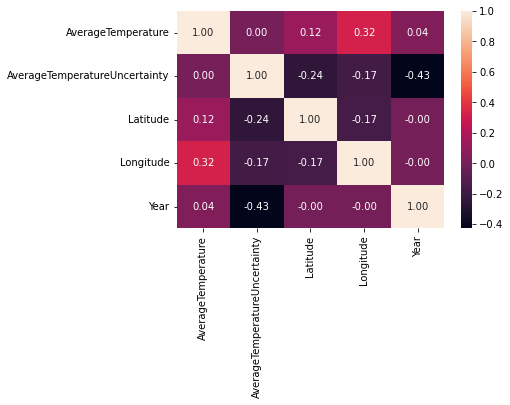

In [10]:
# correlation heat map
sns.heatmap(df.corr(), annot = True, fmt='.2f')

plt.show()

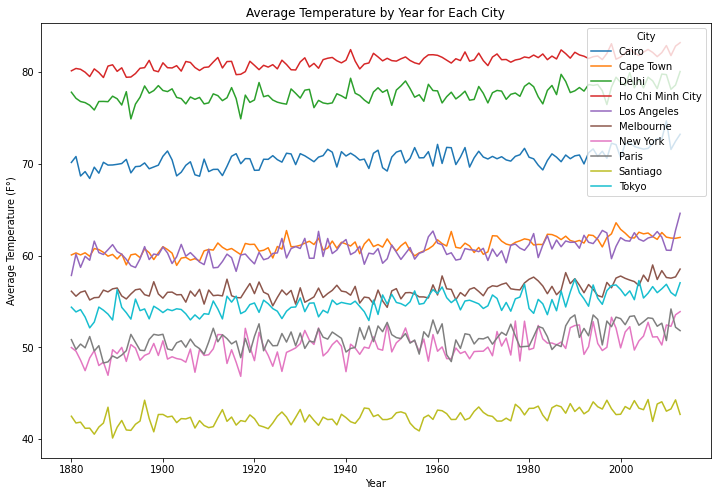

In [11]:
# plot each city's temperature by year
plt.figure(figsize=(12, 8))

sns.lineplot(x='Year', y='AverageTemperature', hue='City', data=grouped_df)

plt.title('Average Temperature by Year for Each City')
plt.xlabel('Year')
plt.ylabel('Average Temperature (F°)')

plt.show()

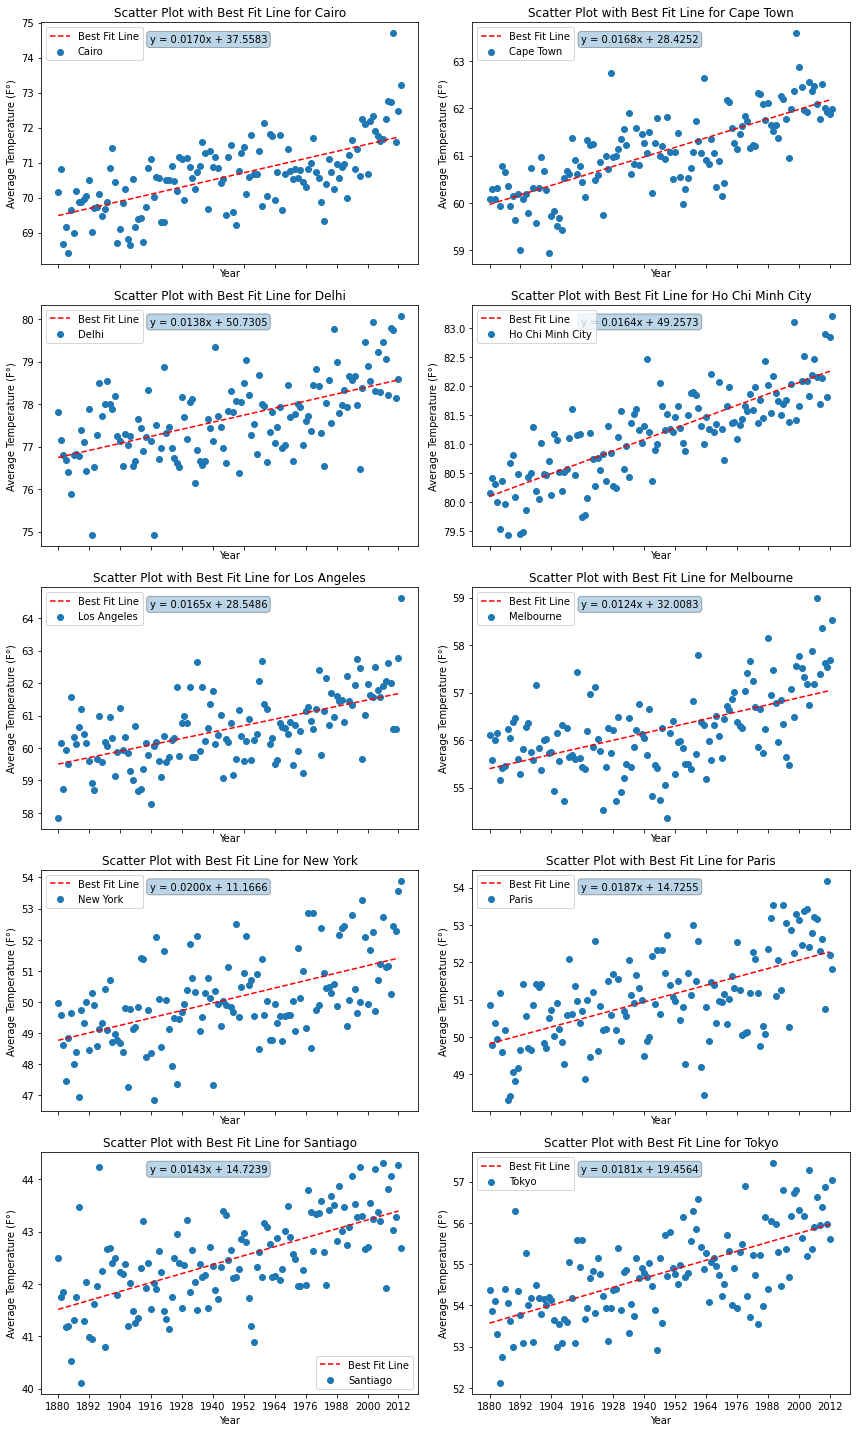

In [12]:
# individual city's temp by year with line of best fit
num_rows = int(np.ceil(len(unique_cities) / 2))
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows), sharex=True)

axs = axs.flatten()

for i, city in enumerate(unique_cities):
    city_data = grouped_df[grouped_df['City'] == city]
    
    # Scatter plot
    axs[i].scatter(city_data['Year'], city_data['AverageTemperature'], label=city)
    
    # Line of best fit
    z = np.polyfit(city_data['Year'], city_data['AverageTemperature'], 1)
    p = np.poly1d(z)
    best_fit_line_x = np.arange(city_data['Year'].min(), city_data['Year'].max() + 1, 4)
    axs[i].plot(best_fit_line_x, p(best_fit_line_x), color='red', linestyle='--', label='Best Fit Line')  
    
    equation_text = f'y = {z[0]:.4f}x + {z[1]:.4f}'
    axs[i].text(0.6, 0.95, equation_text, transform=axs[i].transAxes, ha='right', va='top', bbox=dict(boxstyle='round', alpha=0.3), fontsize=10)
    
    axs[i].set_title(f'Scatter Plot with Best Fit Line for {city}')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Average Temperature (F°)')
    axs[i].legend()

plt.xticks(np.arange(df['Year'].min(), df['Year'].max() + 1, 12))

plt.tight_layout()

plt.show()

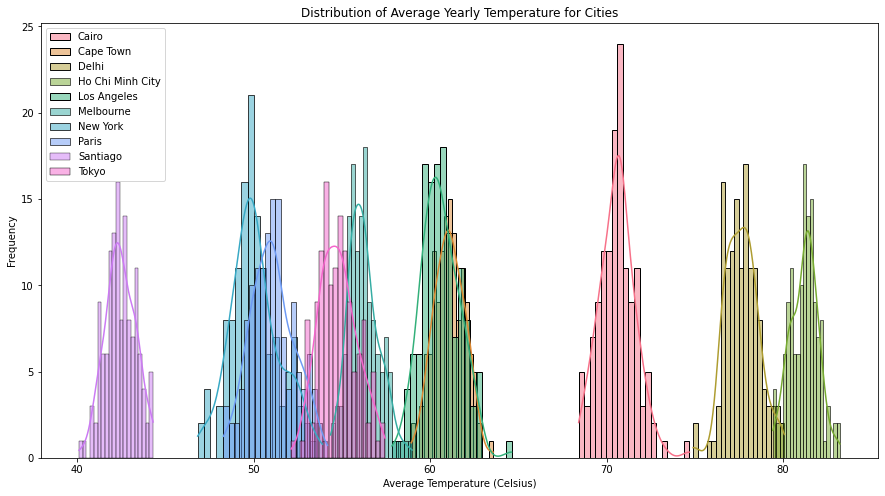

In [20]:
# Create histograms for the average temperature distribution of each city
plt.figure(figsize=(15, 8))
city_palette = sns.color_palette('husl', n_colors=len(grouped_df['City'].unique()))

for i, city in enumerate(grouped_df['City'].unique()):
    city_data = grouped_df[grouped_df['City'] == city]
    sns.histplot(city_data['AverageTemperature'], kde=True, label=city, bins=20, color=city_palette[i])

plt.title('Distribution of Average Yearly Temperature for Cities')
plt.xlabel('Average Temperature (Celsius)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [22]:
# export panel data
grouped_df.to_csv('Panel_Data.csv')